(numpy)=
# Introducción a Numpy

Numpy es quizás el paquete de **computación numérica** más importante de Python. Se desarrolló como un paquete completo de álgebra lineal de código abierto para Python que podía rivalizar con MATLAB y similares. Tiene una larga historia y mucha funcionalidad, ya sea directamente en ella o construida a su alrededor (ver [SciPy](https://scipy.org/) y diferentes scikits). Es la base de otros paquetes del ecosistema de ciencia de datos de diferentes índole
- Extraer, transformar y cargar datos: [Pandas](https://pandas.pydata.org/), [Dask](https://www.dask.org/), [OpenCV](https://opencv.org/)
- Visualización de datos: [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/).
- Modelos y evalución: [Scikit-learn](https://scikit-learn.org/stable/), [statsmodels](https://www.statsmodels.org/stable/index.html), [spaCy](https://spacy.io/)
- Repote: Dash, [Stramlit](https://streamlit.io/)

La clave es que **implementa arrays (matrices) multidimensionales de manera muy eficiente**, con numerosas funcionalidades optimizadas sobre dicha estructura de datos. 

> Es muy común en la comunidad python usar el alias `np` cundo importamos Numpy:

In [1]:
import numpy as np

## ¿Por qué numpy?

Aunque en principio las listas de python podrían servir para representar arrays de varias dimensiones, la eficiencia de numpy es mucho mejor, al estar construido sobre una biblioteca de rutinas en lenguaje C. Además muchas de las operaciones numpy que actúan sobre todo el array, están optimizadas y **permiten evitar los bucles `for`de python**, que actúan más lentamente.

Lo que sigue es un ejemplo de un array de numpy unidimensional con un millón de componentes, y el análogo como lista python. 

In [2]:
arr1 = np.arange(10000000)
list1 = list(range(10000000))

Vamos a obtener el array resultante de multiplicar por 2 cada componente, y veamos el tiempo de CPU que se emplea. Nótese que en el caso de numpy, dicha operación se especifica simplemente como "multiplicar por 2" el array. En el caso de las listas, tenemos que usar un bucle `for` para la misma operación. Obsérvese la gran diferencia en el tiempo de ejecución:  

In [3]:
%timeit for _ in range(10): arr2 = arr1 * 2
%timeit for _ in range(10): list2 = [x * 2 for x in list1]

159 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.46 s ± 371 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Numpy también suele optimizar **el espacio en memoria** necesitado para guardar un array. 

In [7]:
!pip install pympler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 164 kB 5.2 MB/s 


In [8]:
from pympler.asizeof import asizeof
print(asizeof(arr1))
print(asizeof(list1))

80000120
410000112


In [4]:
# cuidado con usar sys.getsizeof en estos casos
import sys 
print(sys.getsizeof(arr1))
print(sys.getsizeof(list1))

80000104
90000120


Comparamos en la siguiente gráfico el tiempo que tardamos en sumar los `n` primeros números usando listas de Python o arrays de numpy.

In [9]:
%config InlineBackend.figure_format='retina'

In [10]:
import time
import matplotlib.pyplot as plt

def get_ex_time(f, tries=10):
    def wrapper(*args, **kwargs):
        ex_times = []
        for _ in range(tries):
            start = time.time()
            f(*args, **kwargs)
            end = time.time()
            ex_time = end - start 
            ex_times.append(ex_time)
        mean_ex_time = np.mean(ex_times)
        return mean_ex_time
    return wrapper

@get_ex_time
def get_duplicate_time_python(i):
    return list(2*x for x in range(i))

@get_ex_time
def get_duplicate_time_numpy(i):
    return 2*np.arange(i)

@get_ex_time
def get_sum_time_python(i):
    return sum(range(i))

@get_ex_time
def get_sum_time_numpy(i):
    return np.sum(np.arange(i))

n = [10**i for i in range(9)]
t_duplicate_python= [get_duplicate_time_python(i) for i in n]
t_duplicate_numpy = [get_duplicate_time_numpy(i) for i in n]
t_sum_python= [get_sum_time_python(i) for i in n]
t_sum_numpy = [get_sum_time_numpy(i) for i in n]

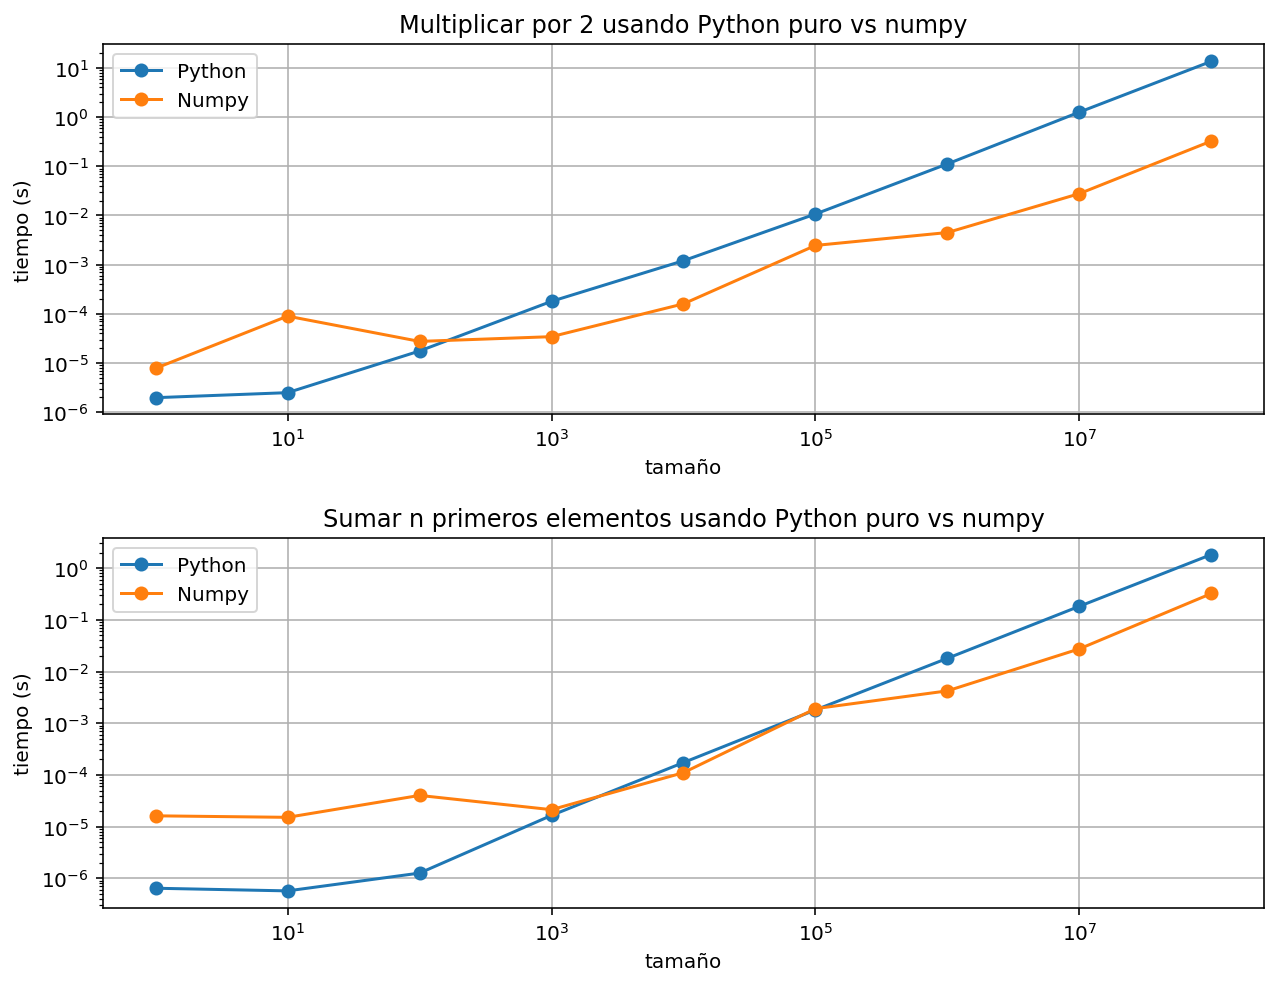

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(9, 7))
ax[0].plot(n, t_duplicate_python, "o-", label="Python")
ax[0].plot(n, t_duplicate_numpy, "o-", label="Numpy")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("tamaño")
ax[0].set_ylabel("tiempo (s)")
ax[0].set_title("Multiplicar por 2 usando Python puro vs numpy")
ax[0].grid(True)
ax[0].legend()
ax[1].plot(n, t_sum_python, "o-", label="Python")
ax[1].plot(n, t_sum_numpy, "o-", label="Numpy")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("tamaño")
ax[1].set_ylabel("tiempo (s)")
ax[1].set_title("Sumar n primeros elementos usando Python puro vs numpy")
ax[1].grid(True)
ax[1].legend()
fig.tight_layout()
fig.show()

---
## Arrays de Numpy

La estructura de datos principal de Numpy es el **array n-dimensional**. Como hemos dicho, Numpy nos permite operar sobre los arrays en su totalidad,  especificando las operaciones como si lo hiciéramos con las componentes individuales. 

Hay muchas formas de crear arrays, como veremos más adelante, pero vamos a empezar creando un array de números psuedoaletorios obtenidos como muestras de una distribución normal de media 0 y desviación típica 1 para empezar a explorar los atributos y posibles operaciones.

In [12]:
data = np.random.randn(2, 3)
data

array([[-0.2255199 ,  0.76653819,  0.56700867],
       [ 1.22134514, -0.16459322, -0.86876857]])

Podemos por ejemplo obtener el array resultante de multiplicar cada componente del array por 10, sin necesidad de hacerlo elemento a elemento

In [13]:
data * 10

array([[-2.25519897,  7.66538191,  5.67008667],
       [12.21345139, -1.64593222, -8.68768571]])

O la suma (o multiplicación) de cada componente consigo mismo:

In [14]:
data + data 
# data*data

array([[-0.45103979,  1.53307638,  1.13401733],
       [ 2.44269028, -0.32918644, -1.73753714]])

Nótese que las operaciones anteriores **no cambian el array sobre el que operan**:

In [15]:
data

array([[-0.2255199 ,  0.76653819,  0.56700867],
       [ 1.22134514, -0.16459322, -0.86876857]])

### Homogeneidad

Los arrays de numpy deben ser **homogéneos**, es decir todas sus componentes son del mismo tipo (tipos predefinidos por numpy, que veremos más adelante). Para acceder al *tipo de numpy* de un array utilizamos el atributo `dtype`

In [ ]:
data.dtype

dtype('float64')

El atributo `ndim` nos da el número de dimensiones, y `shape` nos da el tamaño de cada dimensión, en forma de tupla. También tenemos `size`, que nos da el número de elementos que existen en el array.

En este caso, tenemos que `data` es un array bidimensional, con 2 "filas" y 3 "columnas":

In [ ]:
print(data.ndim)
print(data.shape)

2
(2, 3)


En la terminología de numpy, cada una de las dimensiones se denominan "ejes" (*axis*), y se numeran consecutivamente desde 0. Por ejemplo, en un array bidimensional, el eje 0 (`axis=0`) corresponde a las filas y el eje 1 corresponde a las columnas (`axis=1`). 

![picture](https://drive.google.com/uc?id=1Py65cUUWZMph4JOZe0qZNh_PjsFkaZ6x)

:::{exercise}
:label: introduction-numpy-ndim

Crea un array de numpy de dimensión (4, 1, 3) a partir de listas.

:::

---
## Creación de arrays

La manera más fácil de crear arrays es mediante el método `np.array`. Basta con aplicarlo a cualquier objeto de tipo secuencial que sea susceptible de transformarse en un array. Por ejemplo, una lista de números se transforma en un array unidimensional: 

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Si le pasamos listas anidadas con una estructura correcta, podemos obtener el correspondiente array bidimensional: 

In [16]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Hay otras maneras de crear arrays. Damos a continuación solo algunos ejemplos:

In [22]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
np.ones((3, 6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [28]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [29]:
np.eye(7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [30]:
np.diag(range(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

Podemos usar también `reshape` para transformar entre distintas dimensiones. Por ejemplo, un uso típico es crear un array bidimensional a partir de uno unidimensional:

In [31]:
v = np.arange(12)
M = v.reshape(3, 4)
v, M

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

Hasta ahora sólo hemos visto ejemplos de arrays unidimensionales y bidimensionales. Estas son las dimensiones más frecuentes, pero numpy soporta arrays con cualquier número finito de dimensiones. Por ejemplo, aquí vemos un array de tres dimensiones:

In [32]:
np.zeros((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

Otro generador muy utilizado es `np.linspace`, que nos permite generar $n$ puntos igualmente separados en el un intervalo

In [33]:
# 5 elementos igualmente espaciados en el intervalo [-1, 1]
a = np.linspace(-1, 1, 5)

# 2 elementos en el intervalo [3, 4]
b = np.linspace(3, 4, 2)

# 100 elementos entre [-pi, pi]
c = np.linspace(-np.pi, np.pi, 100)

Cuando trabajamos con números aleatorios, es recomendable crear un [generador de números aleatorios](https://numpy.org/doc/stable/reference/random/generator.html). Existe un método `defult_rng` para ello

In [36]:
rng = np.random.default_rng()

In [37]:
mu, sigma = 0, 0.1 # mean and standard deviation

s = rng.normal(mu, sigma, (10, 100))

:::{exercise}
:label: introduction-numpy-diag

Crea un array de enteros tridimensional en el que cada eje tenga `n` elementos, con -1 en la diagonal y 1 en el resto

:::

---
## Tipos de datos en las componentes de un array (*dtype*)

Numpy incorpora una [una variedad extensa de tipos](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.byte), pero los más usuales son los de tipo `float_`, `int_` y `bool`. Podemos acceder al tipo de un array con el método `dtype`.

![picture](https://drive.google.com/uc?id=100e_ZChM2lfsF6KXERc4dhy1okf6rYS5)

El tipo de dato de las componentes de un array está **implícito** cuando se crea, pero podemos especificarlo: 

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


Podemos pedir información de los tipo usando funciones como `iinfo` o `finfo`

In [ ]:
np.iinfo("int32")

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [ ]:
np.iinfo("uint8")

iinfo(min=0, max=255, dtype=uint8)

In [ ]:
np.finfo("float64")

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

Podemos incluso **convertir el `dtype` de un array** que ya se ha creado, usando el método `astype`. En el ejemplo que sigue, a partir de un array de enteros, obtenemos uno de números de coma flotante:

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype
float_arr

array([1., 2., 3., 4., 5.])

Podemos incluso pasar de coma flotante a enteros, en cuyo caso se trunca la parte decimal:

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

O pasar de strings a punto flotante, siempre que los strings del array tengan sentido como números:

In [ ]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

---
## Operaciones aritméticas con arrays

Una de las características más interesantes de numpy es la posibilidad de aplicar eficientes operaciones aritméticas "componente a componente" entre arrays, sin necesidad de usar bucles `for`. Basta con usar la correspondiente operación numérica de python. 

Veamos algunos ejemplos:

In [40]:
A = np.array([[1., 2., 3.], [4., 5., 6.]])
B = np.array([[8.1, -22, 12.3], [6.1, 7.8, 9.2]])

In [41]:
A * B

array([[  8.1, -44. ,  36.9],
       [ 24.4,  39. ,  55.2]])

In [42]:
A - B

array([[-7.1, 24. , -9.3],
       [-2.1, -2.8, -3.2]])

En principio, para poder aplicar estas operaciones entre arrays, se deben aplicar sobre arrays con las mismas dimensiones (el mismo `shape`). Es posible operar entre arrays de distintas dimensiones, con el **mecanismo de broadcasting**, que veremos más adelante.

Podemos efectuar operaciones entre arrays y números (*escalares*), indicando con ello que la operación con el escalar se aplica a cada uno de los componentes del array. Vemos algunos ejemplos: 

In [43]:
3 + B

array([[ 11.1, -19. ,  15.3],
       [  9.1,  10.8,  12.2]])

In [44]:
1 / A

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [45]:
A ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Igualmente, podemos efectuar comparaciones aritméticas entre dos arrays, obteniendo el correspondiente array de booleanos como resultado:

In [46]:
A > B - 5

array([[False,  True, False],
       [ True,  True,  True]])

En todos los casos anteriores, nótese que estas operaciones **no modifican los arrays sobre los que se aplican**, sino que obtienen un nuevo array con el correspondiente resultado.